Median household income in Los Angeles County from 2015 to 2019, according to the U.S. Census Bureau. In my previous assignment, I used household income in LA City. I struggled to have an accurate representation of the low income/high income neighborhoods in LA since the data was being distorted by the percentage of households under each income category. For this assignment, I will be using the median household income which takes the median income of each census tract, providing a clearer image on the income distribution in LA County.  


In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

Second, I will import my data in Geojson format. 

In [5]:
gdf = gpd.read_file('acs2019_5yr_B19013_14000US06037407102.geojson')

Now, I want to take a look at my data and explore it.

In [6]:
gdf.shape

(2347, 5)

In [7]:
gdf.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06037,"Los Angeles County, CA",68044.0,347.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [8]:
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

In [9]:
gdf.geoid.tail()

2342    14000US06037980031
2343    14000US06037980033
2344    14000US06037990100
2345    14000US06037990200
2346    14000US06037990300
Name: geoid, dtype: object

In [10]:
gdf=gdf.drop([0])

In [11]:
gdf.head()

,geoid,name,B19013001,"B19013001, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Looking at the data types:

In [12]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 1 to 2346
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2346 non-null   object  
 1   name              2346 non-null   object  
 2   B19013001         2310 non-null   float64 
 3   B19013001, Error  2306 non-null   float64 
 4   geometry          2346 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 110.0+ KB


In [13]:
list(gdf)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [14]:
columns_to_keep =['geoid', 'name', 'B19013001','geometry']

In [15]:
gdf= gdf[columns_to_keep]

In [16]:
gdf.head()

,geoid,name,B19013001,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [17]:
gdf.columns = ['geoid', 'name', 'Median Household Income', 'geometry']

In [18]:
gdf.head()

,geoid,name,Median Household Income,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [19]:
gdf['Median Household Income'].describe()

count      2310.000000
mean      73242.844156
std       34516.005733
min        9191.000000
25%       48191.000000
50%       66212.000000
75%       90403.250000
max      250001.000000
Name: Median Household Income, dtype: float64

In [20]:
#median is $66,212

<AxesSubplot:ylabel='Frequency'>

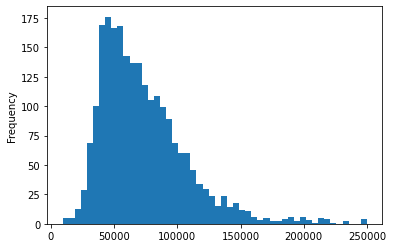

In [21]:
gdf['Median Household Income'].plot.hist(bins=50)

In [22]:
gdf_sorted = gdf.sort_values(by='Median Household Income',ascending = False)

In [23]:
gdf_sorted[['geoid','Median Household Income']].head(20)
#census tracts with the highest median income

,geoid,Median Household Income
2101,14000US06037670500,250001.0
341,14000US06037141700,250001.0
832,14000US06037262303,250001.0
833,14000US06037262400,250001.0
2120,14000US06037701201,234519.0
2332,14000US06037980019,231250.0
834,14000US06037262501,224962.0
840,14000US06037264000,220417.0
339,14000US06037141500,219698.0
828,14000US06037262100,217462.0


<AxesSubplot:>

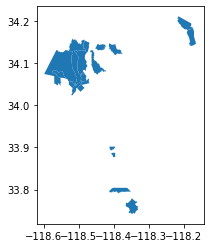

In [24]:
gdf_sorted.head(20).plot()

<AxesSubplot:>

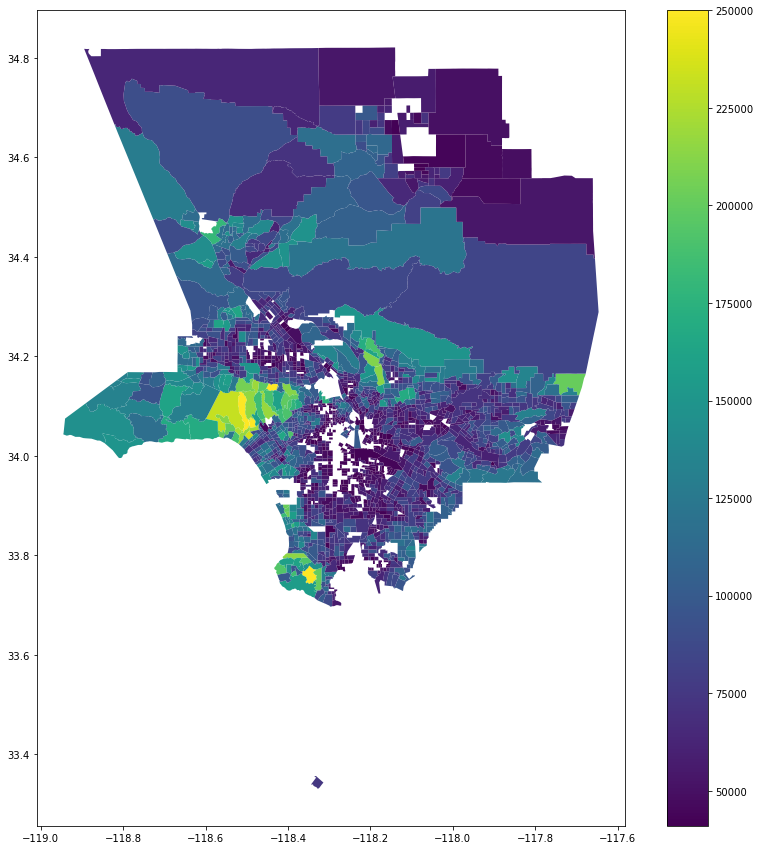

In [25]:
gdf_sorted.head(2000).plot(figsize=(15,15),column='Median Household Income',legend=True)

<AxesSubplot:>

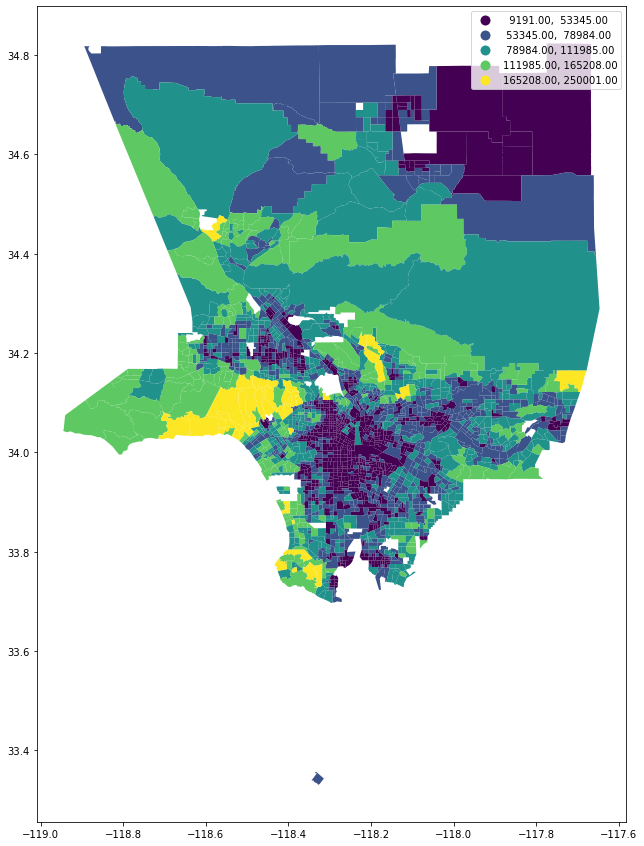

In [26]:
gdf.plot(figsize=(15,15), column = 'Median Household Income', legend = True, scheme = 'NaturalBreaks')

<AxesSubplot:>

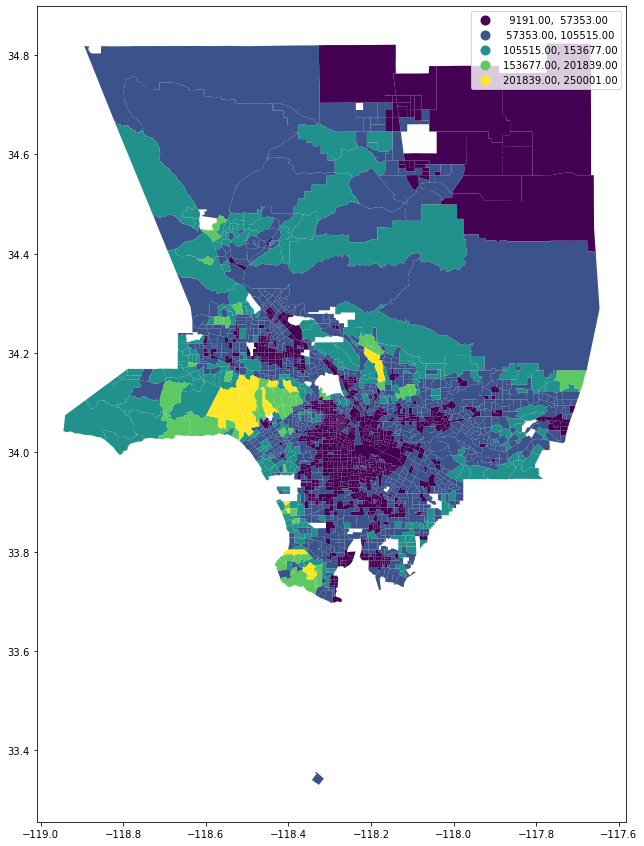

In [27]:
gdf.plot(figsize=(15,15), column = 'Median Household Income', legend = True, scheme = 'equal_interval')

In [28]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [30]:
fig,ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Median Household Income'].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Median Household Income in LA County',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

SyntaxError: invalid syntax (950122096.py, line 7)